In [15]:

from tensorflow import keras

In [16]:
# Load the Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

In [17]:
# Define the model without regularization
model_no_reg = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Define the model with Dropout
model_dropout = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10)
])

In [ ]:
# Define the model with Batch Normalization
model_batchnorm = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(10)
])

In [18]:
import tensorflow as tf

In [19]:
# Compile the model without regularization
model_no_reg.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])




In [ ]:
# Compile the model with Dropout
model_dropout.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

In [ ]:
# Compile the model with Batch Normalization
model_batchnorm.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])

In [20]:
# Train the model without regularization
history_no_reg=model_no_reg.fit(train_images,train_labels, epochs=10, validation_split=0.2)



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7732 - loss: 0.6627 - val_accuracy: 0.8547 - val_loss: 0.4064
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8557 - loss: 0.3996 - val_accuracy: 0.8697 - val_loss: 0.3639
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8716 - loss: 0.3509 - val_accuracy: 0.8597 - val_loss: 0.3896
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8818 - loss: 0.3213 - val_accuracy: 0.8767 - val_loss: 0.3405
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8903 - loss: 0.2940 - val_accuracy: 0.8854 - val_loss: 0.3178
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8938 - loss: 0.2862 - val_accuracy: 0.8714 - val_loss: 0.3518
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9008 - loss: 0.2678 - val_accuracy: 0.8787 - val_loss: 0.3371
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9012 - loss: 0.2616

In [ ]:
# Train the model with Dropout
history_dropout=model_dropout.fit(train_images,train_labels,epochs=10,
validation_split=0.2)

In [ ]:
# Train the model with Batch Normalization
history_batchnorm=model_batchnorm.fit(train_images,train_labels,epochs=10,
validation_split=0.2)
import os
print(os.listdir('sample_data'))

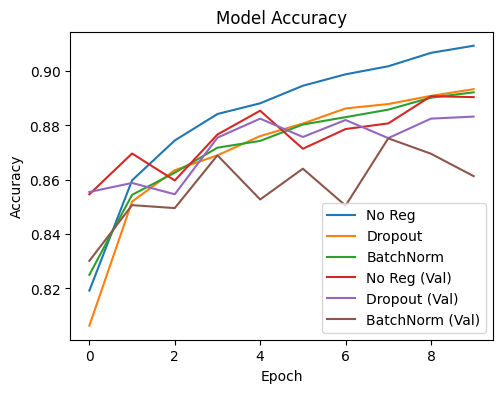

In [21]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_reg.history['accuracy'], label='No Reg')
plt.plot(history_dropout.history['accuracy'], label='Dropout')
plt.plot(history_batchnorm.history['accuracy'], label='BatchNorm')
plt.plot(history_no_reg.history['val_accuracy'], label='No Reg (Val)')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout (Val)')
plt.plot(history_batchnorm.history['val_accuracy'], label='BatchNorm (Val)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


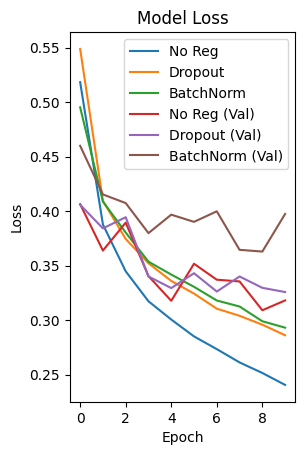

In [22]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_no_reg.history['loss'], label='No Reg')
plt.plot(history_dropout.history['loss'], label='Dropout')
plt.plot(history_batchnorm.history['loss'], label='BatchNorm')
plt.plot(history_no_reg.history['val_loss'], label='No Reg (Val)')
plt.plot(history_dropout.history['val_loss'], label='Dropout (Val)')
plt.plot(history_batchnorm.history['val_loss'], label='BatchNorm (Val)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()